> {sub-ref}`today` | {sub-ref}`wordcount-words` words | {sub-ref}`wordcount-minutes` min read

# Løsning KN kurver

In [1]:
import math
import pandas
import numpy as np 
import matplotlib.pyplot as plt

Vi skal finne KN-verdiene for fartøyets krengevinkler ved $\nabla = 10000[tonn]$. Med visuell avlesning av KN verdiene i skjæringspunktet for vertikal linje så finner vi _omtrentlige_ verdier. 

<img src='../images/kn-avlesning.png' width= 550px height= 400px >

Avlesningene samler vi i en  [**DataFrame**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) der hver avlesning har formatet $ \text{( krengevinkel , avlest KN )} $, og vi gir kolonnene passende navn for senere bruk. 


In [2]:
stab_data = pandas.DataFrame( [(0,0) , 
                               (10,1.17) , 
                               (20,2.4) , 
                               (30,3.5) , 
                               (40,4.5) , 
                               (50,5.1) , 
                               (60,5.5) , 
                               (70,5.7) ], 
                               columns= ['vinkel', 'kn'] )

stab_data

,vinkel,kn
0,0,0.00
1,10,1.17
2,20,2.40
3,30,3.50
4,40,4.50
5,50,5.10
6,60,5.50
7,70,5.70


I oppgaven er vi ute etter GZ-verdien. Den kan finnes ved å benytte geometrisk relasjonen mellom GZ gitt av: 

$$ \text{GZ = KN - KG sin(} \phi\text{)} $$

<img src='../images/kn-km-relasjon.png' width= 550px height= 400px >

Vi etablerer en ny _kolonne_ i dataframen med navn **gz** og beregner verdiene ut fra formelen over.   

In [3]:
kg = 6.25 #[m] Gitt i oppgaven
stab_data['gz'] = stab_data['kn'] - kg *  np.sin(np.radians(stab_data['vinkel'])) 
stab_data

,vinkel,kn,gz
0,0,0.00,0.000000
1,10,1.17,0.084699
2,20,2.40,0.262374
3,30,3.50,0.375000
4,40,4.50,0.482577
5,50,5.10,0.312222
6,60,5.50,0.087341
7,70,5.70,-0.173079


Vi sier oss nå fornøyd med datamaterialet og går over på å behandle og presentere materialet vi har samlet. Matplotlib gjør presentasjonsjobben utmerket direkte ut av datarammen: 

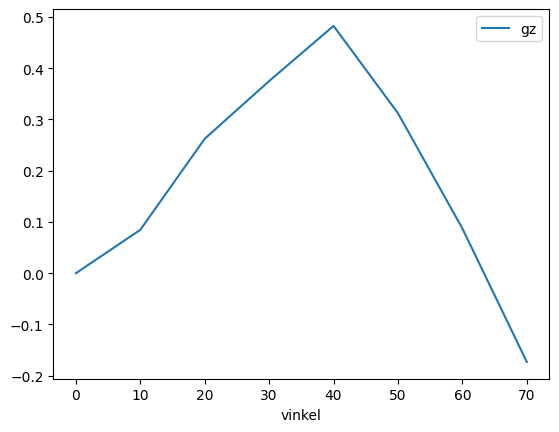

In [4]:
stab_data.plot( 'vinkel' , 'gz' )
plt.show()

Plottet viser GZ-verdien som funksjon av krengevinkel. Vi gjør plottet litt mere presentabelt ved å beskrive hva vi faktisk ser, og gir en god beskrivelse av hva de ulike aksene representerer: 

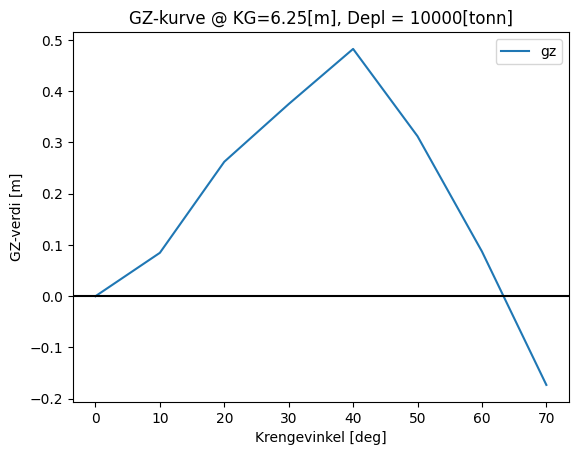

In [5]:
stab_data.plot( 'vinkel' , 'gz' )
plt.xlabel('Krengevinkel [deg]', loc= 'center')
plt.ylabel('GZ-verdi [m]')
plt.title('GZ-kurve @ KG=' + str(kg) +'[m], Depl = 10000[tonn]')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

Grafisk så kan man se at maksimal GZ verdi oppstår ved krengevinkel 40 grader. 
Vi kan få denne informasjonen ut av direkte ut av datarammen:  

In [6]:
stab_data['gz'].max()

0.48257743945912956

**(Avansert)** Tilhørende vinkel og KN-verdi finnes ved å sette radverdien til *GZ* lik maksimalverdien

In [7]:
max_gz = stab_data[stab_data['gz']==stab_data['gz'].max()]
max_gz

,vinkel,kn,gz
4,40,4.5,0.482577


## Metasenterets endring ved krenging
Vi skal nå finne hvor mye _metasenteret_ endrer seg under krenging. Vi har at initialavstanden mellom $K$ og $M_0$ er gitt ved 
$$ KM_0 = KG + GM_0$$

In [8]:
gm_0 = 0.305 #[m], gitt som opplysning i oppgaven 
km_0 = kg + gm_0
print('km_0 = ' + str(km_0) + '[m]')

km_0 = 6.555[m]


Videre kan vi finne ny KM verdi ved krenging 40grader ut fra den geometriske relasjonen $KM_{40} = KN_{40} \times \sin(40)$, og der vi allerede har fått $KN_{40}$ ut fra avlesning av KN-kurven. 

In [9]:
kn_40 = float(max_gz['kn']) #fra datarammen. Bruker float() for å fjerne formatering  
km_40 = kn_40 / np.sin(np.radians(40))
print('km_40 = ' + str(km_40)  + '[m]')


km_40 = 7.000757220871856[m]


C:\Users\larsenyg\AppData\Local\Temp\ipykernel_18076\3984295665.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  kn_40 = float(max_gz['kn']) #fra datarammen. Bruker float() for å fjerne formatering


Differansen i KM gir oss da endring av metasenteret:  
$$ M_0M_{40} = KM_{40} - KM_{0} $$

In [10]:
m0_m40 = km_40 - km_0
print('Metasenterets endring mellom initialposisjon og 40grader krenging er=' + "%.3f" % (m0_m40) + '[m]' )

Metasenterets endring mellom initialposisjon og 40grader krenging er=0.446[m]


### Klasseselskaps krav til areal under GZ-kurve

I oppgaven så er det listet 6 punkter som skal være tilfredstilt for at DNV (klasseselskap) skal kunne godkjenne fartøyet. Vi ser først på de 3 første med krav til areal under GZ-kurven:   
- Areal under GZ-kurven mellom 0-30 grader uttrykt ved $A_{GZ_{0-30}} < 0.055[mrad]$ 
- Areal under GZ-kurven mellom 0-40 grader uttrykt ved $A_{GZ_{0-40}} < 0.09[mrad]$
- Areal under GZ-kurven mellom 30-40 grader uttrykt ved $A_{GZ_{30-40}} < 0.03[mrad]$

Dette kan for enkle kurver som denne regnes manuelt ved å stykke opp arealet i mindre deler bestående av trekanter og rektangler for så å summere de sammen. NB! På x-aksen så er det nå gitt som grader, og det må da regnes om til radianer før en går igang. 

Arealet under en kurve kan bestemmes ved integrasjon $ \int_{a}^{b} f(x) \,dx$, men det fordrer at man vet $f(x)$ som beskriver kurven. I mangel av dette finnes det et par numeriske metoder som løser dette problemet ved kun å vite noen punkter langs kurven:
- [Trapesmetoden](https://no.wikipedia.org/wiki/Trapesintegrasjon)
- [Simpsonmetoden](https://no.wikipedia.org/wiki/Simpson-integrasjon)

Vi går ikke noe nærmere inn på de bortsett fra at vi kan regne på avviket mellom de to. Disse metodene finnes i standardbiblioteket til Python i henholdsvis Scipy og Numpy. 

- Areal under GZ-kurven mellom 0-30 grader uttrykt ved $A_{GZ_{0-30}} < 0.055[mrad]$ 

<img src='../images/krenging-30-grader.png' width= 400px height= 400px >


In [11]:
import scipy
from scipy.integrate import simpson
from numpy import trapz

# Beregner arealet udner kurven ved bruk av trapesmetoden.
area1_30 = trapz( stab_data['gz'][0:4] , dx= np.radians(10))
print("Areal ved trapesmetoden =", "%.5f" % area1_30 , '[mrad]')

# Beregner arealet udner kurven ved bruk av Simpsonmetoden.
area2_30 = simpson(stab_data['gz'][0:4] , dx = np.radians(10))
print("Areal ved Simpsonmetoden =", "%.5f" % area2_30 , '[mrad]')
diff_30 = (area1_30 -area2_30)/ area1_30 * 100 
print('Differansen mellom trapes og Simpson:', "%.2f" % diff_30   , '%')
dnv_30 = 0.055
if min(area1_30, area2_30) >= dnv_30:
    print('Arealet under GZ-kurven mellom 0 og 30 grader er OK ihht DNV kravet') 
else:
    print('Arealet under GZ-kurven mellom 0 og 30 grader er IKKE OK ihht DNV kravet')

Areal ved trapesmetoden = 0.09330 [mrad]
Areal ved Simpsonmetoden = 0.09289 [mrad]
Differansen mellom trapes og Simpson: 0.44 %
Arealet under GZ-kurven mellom 0 og 30 grader er OK ihht DNV kravet


- Areal under GZ-kurven mellom 0-40 grader uttrykt ved $A_{GZ_{0-40}} < 0.09[mrad]$

<img src='../images/krenging-40-grader.png' width= 550px height= 400px >


In [12]:

# Beregner arealet under kurven ved bruk av trapesmetoden.
area1_40 = trapz( stab_data['gz'][0:5] , dx= np.radians(10))
print("Areal ved trapesmetoden =", "%.5f" % area1_40 , '[mrad]')

# Beregner arealet udner kurven ved bruk av Simpsonmetoden.
area2_40 = simpson(stab_data['gz'][0:5] , dx = np.radians(10))
print("Areal ved Simpsonmetoden =", "%.5f" % area2_40 , '[mrad]')
diff = (area1_40 -area2_40)/ area1_40 * 100 
print('Differansen mellom trapes og Simpson:', "%.2f" % diff   , '%')
dnv_40 = 0.09
if min(area1_40, area2_40) >= dnv_40:
    print('Arealet under GZ-kurven mellom 0 og 40 grader er OK ihht DNV kravet') 
else:
    print('Arealet under GZ-kurven mellom 0 og 40 grader er IKKE OK ihht DNV kravet')

Areal ved trapesmetoden = 0.16814 [mrad]
Areal ved Simpsonmetoden = 0.16558 [mrad]
Differansen mellom trapes og Simpson: 1.52 %
Arealet under GZ-kurven mellom 0 og 40 grader er OK ihht DNV kravet


- Areal under GZ-kurven mellom 30-40 grader uttrykt ved $A_{GZ_{30-40}} < 0.03[mrad]$

<img src='../images/krenging-30-40-grader.png' width= 550px height= 400px >

In [13]:

# Beregner arealet under kurven ved bruk av trapesmetoden.
area1_3040 = trapz( stab_data['gz'][3:5] , dx= np.radians(10))
print("Areal ved trapesmetoden =", "%.5f" % area1_3040 , '[mrad]')

# Beregner arealet udner kurven ved bruk av Simpsonmetoden.
area2_3040 = simpson(stab_data['gz'][3:5] , dx = np.radians(10))
print("Areal ved Simpsonmetoden =", "%.5f" % area2_3040 , '[mrad]')
diff = (area1_3040 -area2_3040)/ area1_3040 * 100 
print('Differansen mellom trapes og Simpson:', "%.2f" % diff   , '%')
dnv_3040 = 0.03
if min(area1_3040, area2_3040) >= dnv_3040:
    print('Arealet under GZ-kurven mellom 30 og 40 grader er OK ihht DNV kravet') 
else:
    print('Arealet under GZ-kurven mellom 30 og 40 grader er IKKE OK ihht DNV kravet')

Areal ved trapesmetoden = 0.07484 [mrad]
Areal ved Simpsonmetoden = 0.07484 [mrad]
Differansen mellom trapes og Simpson: 0.00 %
Arealet under GZ-kurven mellom 30 og 40 grader er OK ihht DNV kravet


### Krav til rettende arm

Kravet til "rettende arm" (GZ verdi ved 30 grader) 
- Den rettende arm (GZ) $GZ_{30} >= 0.2[m]$

<img src='../images/rettende-arm.png' width= 550px height= 400px >



### Forklarende plot brukt i løsningsforslaget

In [14]:
# Skisse for area under kurve 30 grader 

stab_data.plot( 'vinkel' , 'gz' )
plt.xlabel('Krengevinkel [deg]', loc= 'center')
plt.ylabel('GZ-verdi [m]')
plt.title('Areal under kurven ved krenging opp til 30grader')
plt.axhline(y=0, color='black', linestyle='-')
plt.fill_between(
        x= stab_data['vinkel']    , 
        y1= stab_data['gz'], 
        where= [True , True , True , True , False , False , False, False ] ,
        color= "b",
        alpha= 0.2)
plt.savefig('krenging-30-grader.png')
plt.close()

In [15]:
stab_data.plot( 'vinkel' , 'gz' )
plt.xlabel('Krengevinkel [deg]', loc= 'center')
plt.ylabel('GZ-verdi [m]')
plt.title('Rettende arm > 0.2[m] ved 30[deg] ')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=0.2, color='red', linestyle='-')
plt.savefig('30grader.png')
plt.close()

In [16]:
stab_data.plot( 'vinkel' , 'gz' )
plt.xlabel('Krengevinkel [deg]', loc= 'center')
plt.ylabel('GZ-verdi [m]')
plt.title('Areal under kurven ved kregning opp til 40grader')
plt.axhline(y=0, color='black', linestyle='-')
plt.fill_between(
        x= stab_data['vinkel']    , 
        y1= stab_data['gz'], 
        where= [True , True , True , True , True , False , False, False ] ,
        color= "r",
        alpha= 0.2)
plt.savefig('krenging-40-grader.png')
plt.close()

In [17]:
stab_data.plot( 'vinkel' , 'gz' )
plt.xlabel('Krengevinkel [deg]', loc= 'center')
plt.ylabel('GZ-verdi [m]')
plt.title('Areal under kurven ved krenging mellom 30-40grader')
plt.axhline(y=0, color='black', linestyle='-')
plt.fill_between(
        x= stab_data['vinkel']    , 
        y1= stab_data['gz'], 
        where= [False , False , False , True , True , False , False, False ] ,
        color= "r",
        alpha= 0.2)
plt.savefig('krenging-30-40-grader.png')
plt.close()